## Принятие решений в бизнесе. Увеличение выручки. 

**Цель исследования**   

Приоретизация гипотез, выполнение и анализ результатов A/B тестов

**Входные данные**  

* гипотезы (файл hypothesis.csv)

`Hypothesis` — краткое описание гипотезы;  
`Reach` — охват пользователей по 10-балльной шкале;  
`Impact` — влияние на пользователей по 10-балльной шкале;  
`Confidence` — уверенность в гипотезе по 10-балльной шкале;  
`Efforts` — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы

* заказы (файл orders.csv)

`transactionId` — идентификатор заказа;  
`visitorId` — идентификатор пользователя, совершившего заказ;  
`date` — дата, когда был совершён заказ;  
`revenue` — выручка заказа;  
`group` — группа A/B-теста, в которую попал заказ.

* посетители (файл visitors.csv)

`date` — дата;  
`group` — группа A/B-теста;  
`visitors` — количество пользователей в указанную дату в указанной группе A/B-теста.

**Ход исследования**  

1. Подготовка данных
2. Расчет ICE для гипотез
3. Расчет RICE для гипотез
4. Построенте графиков
5. Проверка стат. гипотез
6. Вывод

**Навыки и инструменты**    

`Pandas`   
`Numpy`   
`Matplotlib`   
`Stats`   

`A/B-тестирование`  
`Проверка стат. гипотез`  
`Событийная аналитика`  

**Вывод**  

Исходя из обнаруженных фактов, тест следует остановить и признать его успешным.

Анализ данных говорит о наличии статистически значимых различий в среднем количестве транзакций между группами как по сырым, так и по очищенным данным. Т.е. среднее количество заказов на посетителя в группе B статистически значимо. 

Анализ даннхых говорит об отсутствии стат. значимых различий в среднем чеке заказа между группами по сырым и очищенным данным. Но при этом относительное различие среднего чека между сегментами практически пропало после очистки данных от аномалий.

В процессе работы с даннми было обнаружено, что некоторые пользователи присутствовали в обеих группах, что нарушает правило проведения A/B тестирования (в нашем случае 58 пользователей видели обе версии сайта, чего допускать нельзя). 
Рекомендуется проверить корректность обработки показа сайта для пользователей и пересмотреть систему тестирования на наличие ошибок. 

In [1]:
import pandas as pd 
import numpy as np 
import datetime as dt
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
import warnings  
import scipy.stats as stats
pd.options.display.max_colwidth = 100 # изменяет максимальную ширину колонки до 100
register_matplotlib_converters()

hypothesis = pd.read_csv('/datasets/hypothesis.csv')
orders = pd.read_csv('/datasets/orders.csv')
visitors = pd.read_csv('/datasets/visitors.csv')


### Подготовка данных

##### Функция для визуализации пропусков в данных

In [2]:
def vis_nan(df):
    # вывод информации о пропусках в процентах по каждому столбцу
    for col in df.columns:
        pct_missing = np.mean(df[col].isnull())
        print('{} - {}%'.format(col, round(pct_missing*100)))
    

##### Функция для вывода всей общей информации

In [3]:
def gen_info(df):
    return display(df.sample(9)), \
    display(df.describe()), \
    display(df.info()), \
    display(df.shape), \
    display(vis_nan(df))

##### Применим функции

In [4]:
gen_info(hypothesis)

,Hypothesis,Reach,Impact,Confidence,Efforts
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средни...",8,3,7,3
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конве...",5,3,8,3
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5


,Reach,Impact,Confidence,Efforts
count,9.000000,9.000000,9.000000,9.000000
mean,4.777778,4.777778,5.555556,4.888889
std,3.153481,3.192874,3.045944,2.803767
min,1.000000,1.000000,1.000000,1.000000
25%,3.000000,3.000000,3.000000,3.000000
50%,3.000000,3.000000,7.000000,5.000000
75%,8.000000,7.000000,8.000000,6.000000
max,10.000000,10.000000,9.000000,10.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


None

(9, 5)

Hypothesis - 0%
Reach - 0%
Impact - 0%
Confidence - 0%
Efforts - 0%


None

(None, None, None, None, None)

In [5]:
gen_info(orders)

,transactionId,visitorId,date,revenue,group
554,3986425716,3908431265,2019-08-06,890,A
412,2100491088,1147554328,2019-08-06,990,B
254,1545495643,2686716486,2019-08-23,34340,B
153,4045393544,991436984,2019-08-01,1790,A
152,3227521980,3938001975,2019-08-01,9980,B
402,371848868,1294878855,2019-08-28,3080,B
1081,1181289994,3636615199,2019-08-12,8590,A
704,1185885568,759473111,2019-08-07,19520,A
653,2107411712,2819363575,2019-08-07,1530,B


,transactionId,visitorId,revenue
count,1.197000e+03,1.197000e+03,1.197000e+03
mean,2.155621e+09,2.165960e+09,8.348006e+03
std,1.229085e+09,1.236014e+09,3.919113e+04
min,1.062393e+06,5.114589e+06,5.000000e+01
25%,1.166776e+09,1.111826e+09,1.220000e+03
50%,2.145194e+09,2.217985e+09,2.978000e+03
75%,3.237740e+09,3.177606e+09,8.290000e+03
max,4.293856e+09,4.283872e+09,1.294500e+06


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


None

(1197, 5)

transactionId - 0%
visitorId - 0%
date - 0%
revenue - 0%
group - 0%


None

(None, None, None, None, None)

In [6]:
gen_info(visitors)

,date,group,visitors
2,2019-08-03,A,507
41,2019-08-11,B,721
3,2019-08-04,A,717
23,2019-08-24,A,395
0,2019-08-01,A,719
43,2019-08-13,B,769
22,2019-08-23,A,468
49,2019-08-19,B,487
61,2019-08-31,B,718


,visitors
count,62.000000
mean,607.290323
std,114.400560
min,361.000000
25%,534.000000
50%,624.500000
75%,710.500000
max,770.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


None

(62, 3)

date - 0%
group - 0%
visitors - 0%


None

(None, None, None, None, None)

**Вывод**:  
Пропусков в данных нет, но нужно изменить тип данных в столбце date

In [7]:
orders['date'] = pd.to_datetime(orders['date'])
visitors['date'] = pd.to_datetime(visitors['date'])

### Часть 1 

In [8]:
hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средни...",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конве...",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


Переведем названия столбцов в нижний регистр. 

In [9]:
hypothesis.columns = [name.lower() for name in hypothesis.columns]

##### Посчитаем ICE для гипотез 

In [10]:
hypothesis['ICE'] = round((hypothesis['impact'] * hypothesis['confidence']) / hypothesis['efforts'], 2)
hypothesis.sort_values(by = 'ICE', ascending = False) 

,hypothesis,reach,impact,confidence,efforts,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конве...",5,3,8,3,8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средни...",8,3,7,3,7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.00


##### Посчитаем RICE для гипотез 

In [11]:
hypothesis['RICE'] = round((hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence']) / hypothesis['efforts'], 2)
hypothesis.sort_values(by = 'RICE', ascending = False) 

,hypothesis,reach,impact,confidence,efforts,ICE,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20,112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средни...",8,3,7,3,7.00,56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33,40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конве...",5,3,8,3,8.00,40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20,16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.12,9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.00,4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.33,4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.00,3.0


**Вывод**: Фрейморк `RICE` при расчете учитывает показатель "reach". В формуле он располагается в числителе и умножается на все остальные показатели тем самым увеличивая показатель `RICE`. Следрвательно чем больше reach, тем больше показатель `RICE`. Эти изменения можно наблюдать при сравнении показателей `ICE` и `RICE`.  

При использования фреймворка `ICE` первенство занимала гипотеза "*Запустить акцию, дающую скидку на товар в день рождения*". Эта гипотеза имела высокий impact и confidence и поэтому имела высокий `ICE`. Но при этом эта же гипотеза имела самый низкий возможный reach. При подсчете `ICE` этот показатель не учитывается. Поэтому при расчете `RICE` эта гипотеза спускаеися на 5 место, а первенство занимает уже гипотеза "*Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок*". Эта гипотеза имеет высокие `reach`, `impact`, `confidence` и средний показатель `efforts`.

Так же сильные изменения при разных фреймворках произошли для гипотезы "*Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар*": при расчете `ICE` эта гипотеза занимала предпоследнее место, а при расчете `RICE` уже 2-ое. Этот случай ярко демонстрирует как сильно один показатель влияет на приоретизацию гипотез и как важен выбор фрейморка. 

### Часть 2

In [12]:
orders

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
...,...,...,...,...,...
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A
1195,1947021204,1614305549,2019-08-14,100,A


In [13]:
orders.duplicated().sum()

0

**Явных дубликатов нет**

##### Проверим не попали ли пользователи одной группы в другую. Используем для этого множества.

In [14]:
id_group_a = orders.query('group == "A"')['visitorId']
id_group_b = orders.query('group == "B"')['visitorId']
len(set(id_group_a) & set(id_group_b))

58

**Вывод**: Обнаружили 58 пользователей, которые каким-то образом попали в обе группы. Преподаватель по проектам объяснил, что удалять их не нужно и в реальной практике нужно сообщить об этом случае разработке. 

In [15]:
visitors

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
...,...,...,...
57,2019-08-27,B,720
58,2019-08-28,B,654
59,2019-08-29,B,531
60,2019-08-30,B,490


In [16]:
visitors.duplicated().sum()

0

**Явных дубликатов нет**

##### Построим график кумулятивной выручки по группам

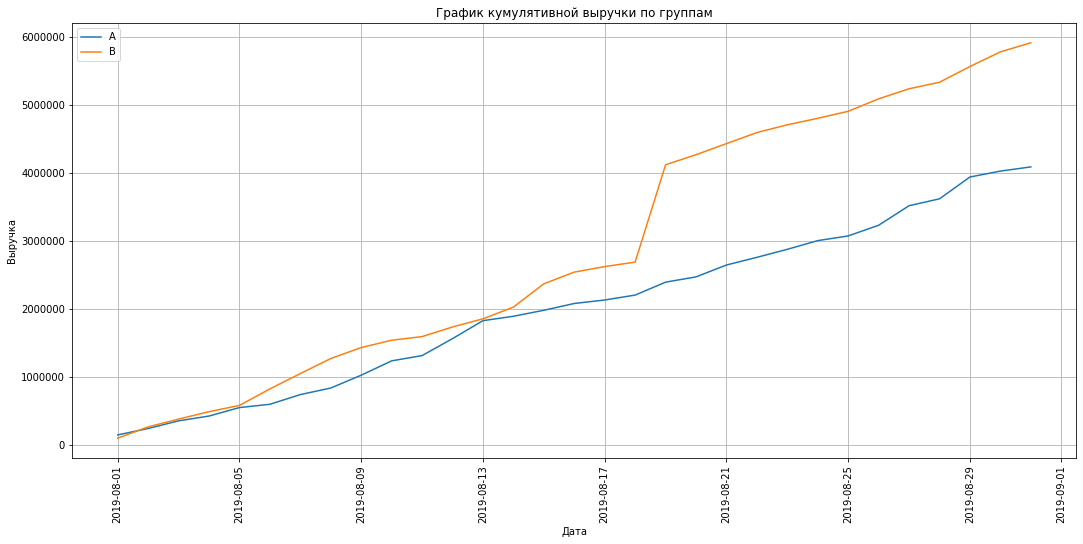

In [17]:
datesGroups = orders[['date', 'group']].drop_duplicates()

ordersAggregated = datesGroups.apply(
    lambda x: orders[
        np.logical_and(
            orders['date'] <= x['date'], orders['group'] == x['group']
        )
    ].agg(
        {
            'date': 'max',
            'group': 'max',
            'transactionId': 'nunique',
            'visitorId': 'nunique',
            'revenue': 'sum',
        }
    ),
    axis=1,
).sort_values(by=['date', 'group'])

visitorsAggregated = datesGroups.apply(
    lambda x: visitors[
        np.logical_and(
            visitors['date'] <= x['date'], visitors['group'] == x['group']
        )
    ].agg({'date': 'max', 'group': 'max', 'visitors': 'sum'}),
    axis=1,
).sort_values(by=['date', 'group'])

cumulativeData = ordersAggregated.merge(
    visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group']
)
cumulativeData.columns = [
    'date',
    'group',
    'orders',
    'buyers',
    'revenue',
    'visitors',
]

plt.figure(figsize=(18,8))
plt.grid()
plt.title('График кумулятивной выручки по группам')
plt.xlabel('Дата')
plt.ylabel('Выручка')

plt.ticklabel_format(style='plain') # предотвращает "научное" обозначение на осях
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.xticks(rotation = 90)
plt.legend();

**Вывод**: Сегмент B лидирует на протяжении всего теста, иногда соприкасаясь с сегментом A. Во 2ой половине теста виден резкое повышение сегмента B, что можно объяснить аномально большим заказом. 

##### Построим график кумулятивного среднего чека по группам

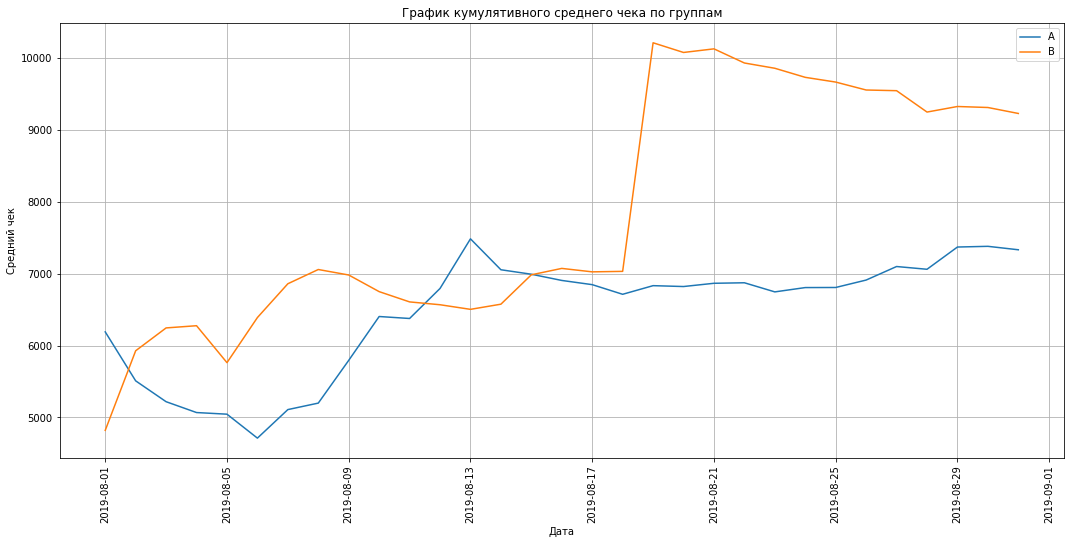

In [18]:
plt.figure(figsize=(18,8))
plt.grid()
plt.title('График кумулятивного среднего чека по группам')
plt.xlabel('Дата')
plt.ylabel('Средний чек')
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.xticks(rotation = 90)
plt.legend();

**Вывод**: Кумулятивное значение среднего чека по сегментам колеблется в 1ой половине месяца, а в начале 2ой половины месяца наблюдается резкое повышение. Возможно потребуется искоючить выбросы, которые могут исказить результаты.

##### Построим график относительного различия в среднем чеке между группами.

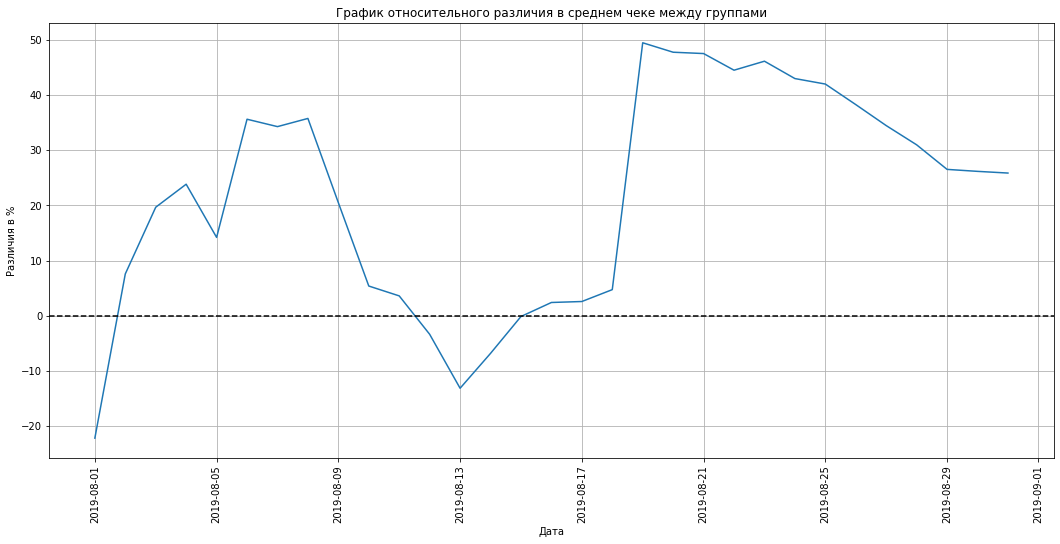

In [19]:
plt.figure(figsize=(18,8))
plt.grid()
plt.title('График относительного различия в среднем чеке между группами')
plt.xlabel('Дата')
plt.ylabel('Различия в %')
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])*100-100)
plt.axhline(y=0, color='black', linestyle='--')
plt.xticks(rotation = 90);

**Вывод**: Результаты теста резко менялись 2019-08-08 (начало падения) и 2019-08-18 (резкий всплеск). Но к концу рассматриваемого периода группа B показала лучшие результаты по среднему чеку (~ 25%) 

##### Постройте график кумулятивного среднего количества заказов на посетителя по группам. Сделайте выводы и предположения.

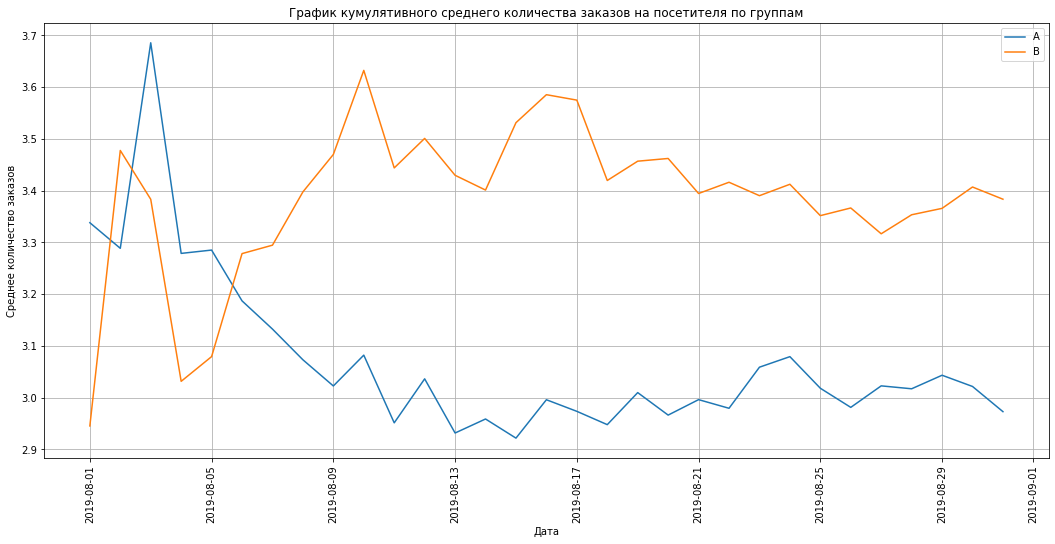

In [20]:
plt.figure(figsize=(18,8))
plt.grid()
plt.title('График кумулятивного среднего количества заказов на посетителя по группам')
plt.xlabel('Дата')
plt.ylabel('Среднее количество заказов')
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion']*100, label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion']*100, label='B')
plt.xticks(rotation = 90)
plt.legend();

**Вывод**: В начале теста сегмент А имел бОльшую конверсию (3,7% в пике), но уже после 2019-09-05 графики пересеклись и конверсия сегмента B стала выше и сохраняла свое превосходство вполть до конца теста (3,4% в группе B против 3% в группе A)

##### Построим график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A

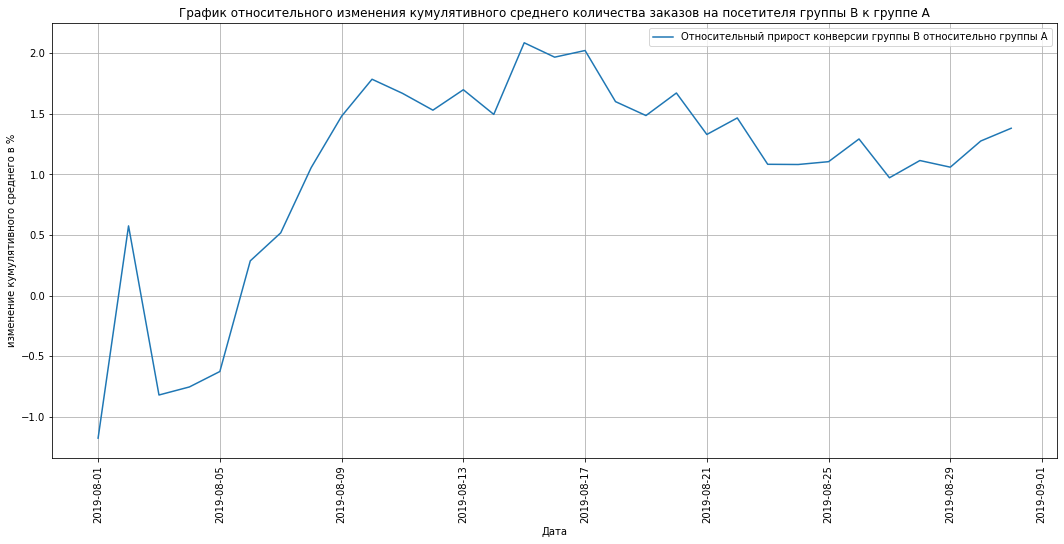

In [21]:
plt.figure(figsize=(18,8))
plt.grid()
plt.title('График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A')
plt.xlabel('Дата')
plt.ylabel('изменение кумулятивного среднего в %')
mergedCumulativeConversions = cumulativeDataA[['date', 'conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']*10-10, label="Относительный прирост конверсии группы B относительно группы A")
plt.xticks(rotation = 90)
plt.legend();


**Вывод**: Почти с самого начала теста группа B лидирует по конверсии и достигает пика 2019-08-17. Начиная с этой даты конверсия снижается с 2% в пике до ~1,5%

##### Построим точечный график количества заказов по пользователям

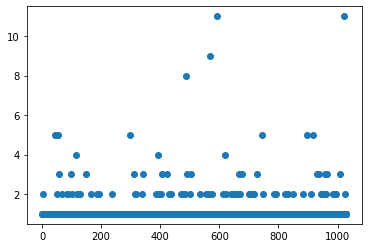

In [22]:
ordersByUsers = (
    orders.groupby('visitorId', as_index=False)
    .agg({'transactionId': 'nunique'})
)
ordersByUsers.columns = ['visitorId', 'transactions']

x_values = pd.Series(range(0, len(ordersByUsers)))
plt.scatter(x_values, ordersByUsers['transactions']); 

**Вывод**: Пользователей, заказавших более 2-х раз мало. Можно считать таких пользователей аномальными. Но более точный ответ дадут перцентили. 

##### Посчитаем 95-й и 99-й перцентили количества заказов и определим границу для определения аномальных пользователей.

In [23]:
np.percentile(ordersByUsers['transactions'], [95, 99])

array([2., 4.])

**Вывод**: Не более 5% пользователей совершали больше 2-х заказов и не более 1% пользователей больше 4-х. В качестве границы для аномальных пользователей выберем 95-ый перцентиль: всех пользователей, у которых более 2-х транзакций будем считать аномальными. 

##### Построим точечный график стоимостей заказов

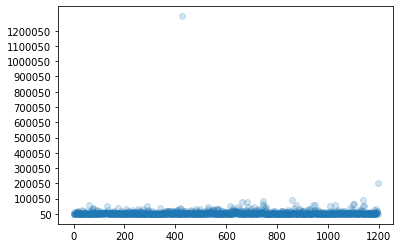

In [24]:
x_values = pd.Series(range(0, len(orders['revenue'])))
plt.scatter(x_values, orders['revenue'], alpha=0.2)
plt.ticklabel_format(useOffset=False, style='plain'); # предотвращает "научное" обозначение на осях
plt.yticks(np.arange(min(orders['revenue']), max(orders['revenue']), 100000)); # изменяет частоту отметок по оси y (каждые 100 тыс.)

**Вывод**: Заказов стоимостью больше 100 тыс. почти нет. Есть выбросы более 1.2 млн. Такие заказы выгялят аномальными. 

##### Посчитаем 95-й и 99-й перцентили стоимости заказов, выберем границу для определения аномальных заказов. 

In [25]:
np.percentile(orders['revenue'], [95, 99])

array([28000. , 58233.2])

**Вывод**: Не более 5% заказов стоят дороже 28 тыс., и не более  1% стоят дороже 58 тыс. В качестве границы для аномальных покупок выберем 95-ый перцентиль: покупки дороже 28 тыс. будем считать аномальными. 

##### Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным

H_0: Среднее количество заказов на посетителя в группе A по неподготовленным данным = среднему количеству заказов на посетителя в группе B по неподготовленным данным.  
H_a: Среднее количество заказов на посетителя в группе A по неподготовленным данным ≠ среднему количеству заказов на посетителя в группе B по неподготовленным данным.

In [26]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitorId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitorId', 'orders'] 

sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

print("P-value: {0:.5f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

print("Относительный прирост средней конверсии группы B к группе A в %: {0:.3f}".format((data['ordersPerDateB'].sum()/data['visitorsPerDateB'].sum())/(data['ordersPerDateA'].sum()/data['visitorsPerDateA'].sum())*100-100))

P-value: 0.01679
Относительный прирост средней конверсии группы B к группе A в %: 13.808


**Вывод**: P-value меньше 0,05. Отвергаем нулевю гипотезу. Анализ сырых данных говорит о наличии статистически значимых различий в среднем количестве транзакций между группами. Относительный прирост среднего группы B к конверсии группы A равен 13,8%. Возможно, после отчистки данных показатели изменятся.

##### Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным

H_0: Средний чек заказа в группе A по неподготовленным данным = среднему чеку заказа в группе B по неподготовленным данным.  
H_a: Средний чек заказа в группе A по неподготовленным данным ≠ среднему чеку заказа в группе B по неподготовленным данным.

In [27]:
print('P-value: {0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('Различия среднего чека по группам в %: {0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()*100-100)) 

P-value: 0.729
Различия среднего чека по группам в %: 25.871


**Вывод**: P-value больше 0,05 – статистически значимых отличий нет. Но при этом относительное различие среднего чека между сегментами 26%. Возможно, после отчистки данных показатели изменятся.

##### Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. 
Сформулируем гипотезы:  

H_0: Среднее количество заказов на посетителя в группе A по подготовленным данным = среднему количеству заказов на посетителя в группе B по подготовленным данным.  
H_a: Среднее количество заказов на посетителя в группе A по подготовленным данным ≠ среднему количеству заказов на посетителя в группе B по подготовленным данным.

Для начала найдем пользователей, у которых больше 2-х заказов или совершил транзакцию более чем на 280 тыс. рублей.

In [28]:
visitorsWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > np.percentile(ordersByUsers['transactions'], [95])[0]]['visitorId'],
        ordersByUsersB[ordersByUsersB['orders'] > np.percentile(ordersByUsers['transactions'], [95])[0]]['visitorId'],
    ],
    axis=0,
)
visitorsWithExpensiveOrders = orders[orders['revenue'] > np.percentile(orders['revenue'], [95])[0]]['visitorId']
abnormalUsers = (
    pd.concat([visitorsWithManyOrders, visitorsWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(abnormalUsers.head(5))

1099    148427295
18      199603092
928     204675465
23      237748145
37      249864742
Name: visitorId, dtype: int64


А затем посчитаем стат значимость

In [29]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['visitorId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['visitorId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
) 

print('P-value: {0:.5f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('Различия в среднем количестве заказов на посетителя в %: {0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()*100-100)) 

P-value: 0.01304
Различия в среднем количестве заказов на посетителя в %: 17.270


**Вывод**: Как и в случае с сырыми данными, стат. значимость достигнута. Сегмент B значительно лучше сегмента A.

##### Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным.

H_0: Средний чек заказа в группе A по подготовленным данным = среднему чеку заказа в группе B по подготовленным данным.  
H_a: Средний чек заказа в группе A по подготовленным данным ≠ среднему чеку заказа в группе B по подготовленным данным.

In [30]:
print(
    'P-value: {0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print(
    "Относительное различие среднего чека между группами: {0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
) 

P-value: 0.738
Относительное различие среднего чека между группами: -0.020


**Вывод**: P-value больше 0,05 – статистически значимых отличий все еще нет. Но относительное различие среднего чека между сегментами практически пропало. Разница по средним чекам пропала после фильтрации аномальных данных.

### Общий вывод

Исходя из обнаруженных фактов, тест следует остановить и признать его успешным.



Анализ данных говорит о наличии статистически значимых различий в среднем количестве транзакций между группами как по сырым, так и по очищенным данным. Т.е. среднее количество заказов на посетителя в группе B статистически значимо. 

Анализ даннхых говорит об отсутствии стат. значимых различий в среднем чеке заказа между группами по сырым и очищенным данным. Но при этом относительное различие среднего чека между сегментами практически пропало после очистки данных от аномалий.

В процессе работы с даннми было обнаружено, что некоторые пользователи присутствовали в обеих группах, что нарушает правило проведения A/B тестирования (в нашем случае 58 пользователей видели обе версии сайта, чего допускать нельзя). 
Рекомендуется проверить корректность обработки показа сайта для пользователей и пересмотреть систему тестирования на наличие ошибок. 